# how to use statsmodel(basic)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# macrodata.csv 사용.

    # year      - 1959q1 - 2009q3
    # quarter   - 1-4
    # realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
    #             seasonally adjusted annual rate)
    # realcons  - Real personal consumption expenditures (Bil. of chained
    #             2005 US$, seasonally adjusted annual rate)
    # realinv   - Real gross private domestic investment (Bil. of chained
    #             2005 US$, seasonally adjusted annual rate)
    # realgovt  - Real federal consumption expenditures & gross investment
    #             (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    # realdpi   - Real private disposable income (Bil. of chained 2005
    #             US$, seasonally adjusted annual rate)
    # cpi       - End of the quarter consumer price index for all urban
    #             consumers: all items (1982-84 = 100, seasonally adjusted).
    # m1        - End of the quarter M1 nominal money stock (Seasonally
    #             adjusted)
    # tbilrate  - Quarterly monthly average of the monthly 3-month
    #             treasury bill: secondary market rate
    # unemp     - Seasonally adjusted unemployment rate (%)
    # pop       - End of the quarter total population: all ages incl. armed
    #             forces over seas
    # infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    # realint   - Real interest rate (tbilrate - infl)

df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<Axes: >

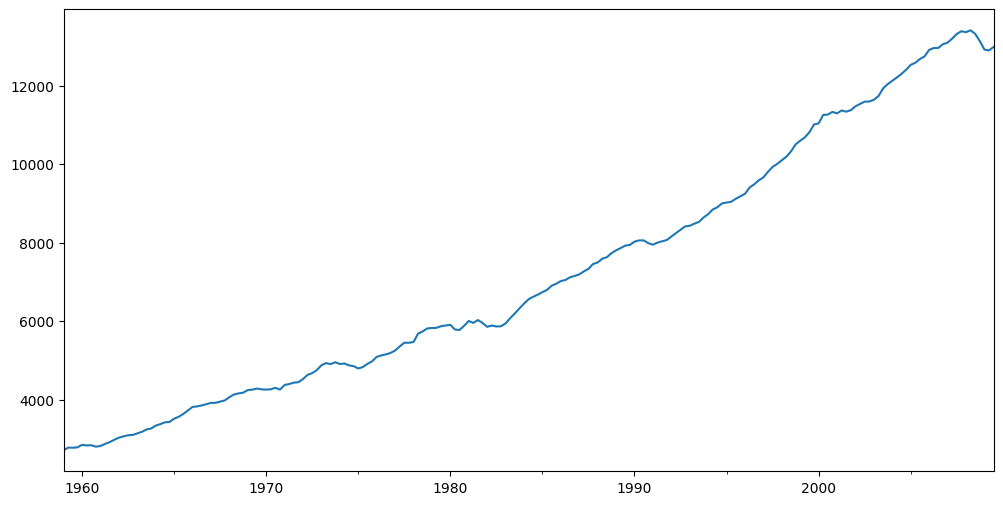

In [9]:
df.realgdp.plot(figsize=(12,6))

# 하고자 하는 것은? => statsmodel을 사용해서 추세를 찾아내기!

In [11]:
# tsa => time series analysis
# hp_filter => Hodrick–Prescott filter호드릭-프레스콧 필터.
#              시계열 데이터의 추세 요소(trend)와 순환 요소(cycle) 두가지 데이터를 튜플형으로 반환함.

from statsmodels.tsa.filters.hp_filter import hpfilter


# hpfilter(x, lamb)
# x : 시계열 데이터.
# lamb : 호드릭-프레스콧 필터에 쓰이는 손실함수의 평활계수. 추세 요소의 증가율 변동 폭을 조절하는 역할.
#        데이터 종류에 따라 적절한 람다값이 밝혀져 있음. 분기 데이터는 1600, 연간 데이터는 6.25, 월간 데이터는 129,600이 적당함.

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)  # => macrodata.csv는 분기 데이터이기 때문에 lamb 값은 1600.

In [21]:
# 원본 df에 trend, cycle 추가 후 plot
df['trend'] = gdp_trend
df['cycle'] = gdp_cycle

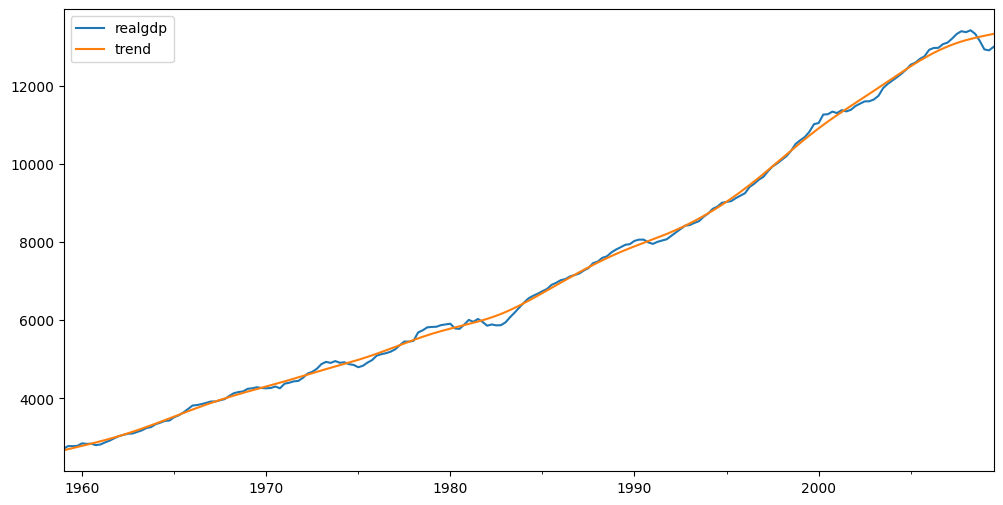

<Axes: >

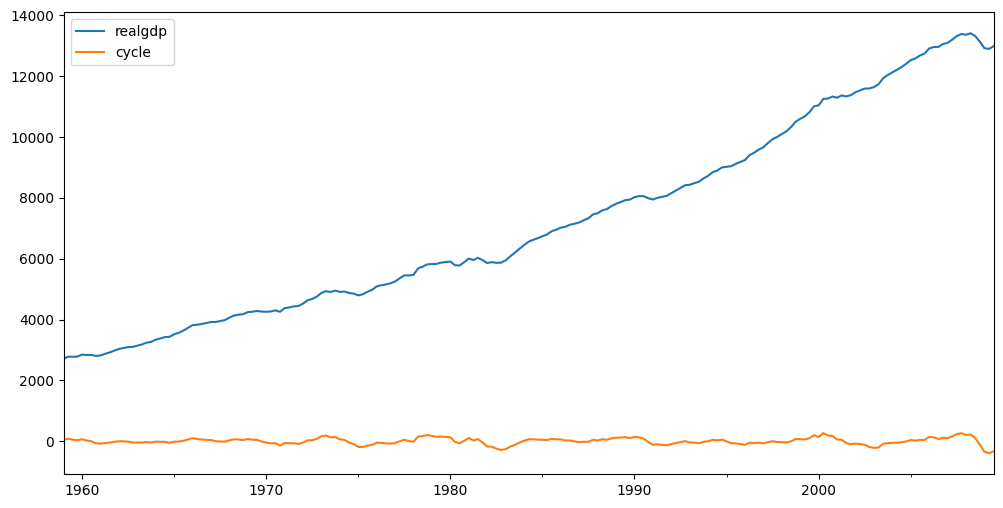

In [23]:
df[['realgdp', 'trend']].plot(figsize=(12,6))
plt.show()

df[['realgdp', 'cycle']].plot(figsize=(12,6))

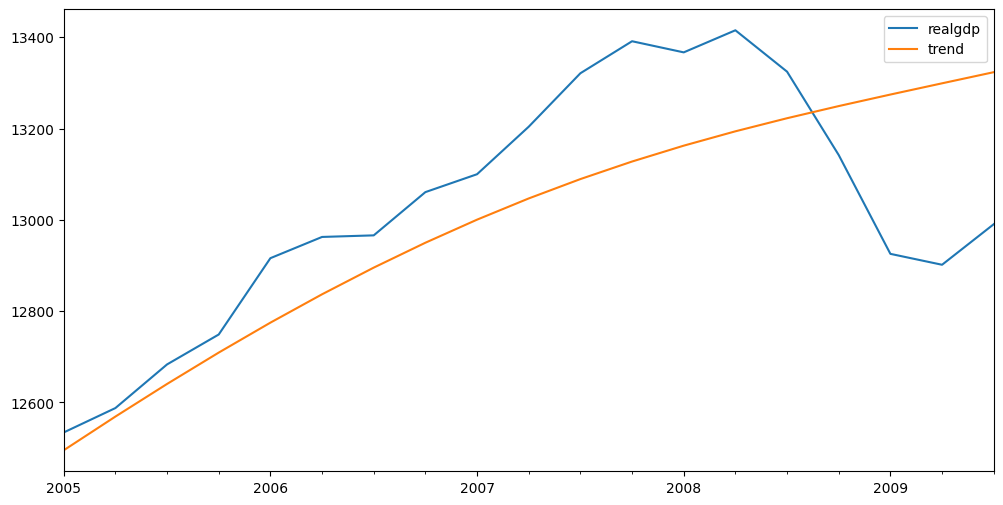

In [24]:
# 2005년 1월 1일 이후부터 보자.
df[['realgdp', 'trend']]['2005-01-01':].plot(figsize=(12,6));

## ETS decomposition(time series)

In [ ]:
# ETS models => Error, Trend, Seasonality
# ETS decomposition(분해)는 여러 ETS models 중 하나이고, ETS models는 statsmodel에 포함된다.
# 원본 데이터, Residual(잔차) 데이터, Trend 데이터, Seasonality 데이터, 즉 총 4가지 데이터를 반환함.
# 잔차? => 추세나 계절성으로 설명되지 않는 데이터.

In [27]:
# airline_passengers.csv 데이터 사용
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
airline

# 주의! => ETS 분해를 할 때 결측치가 있으면 안 된다. 데이터에 결측치가 있다면 꼭 처리해야 한다.

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

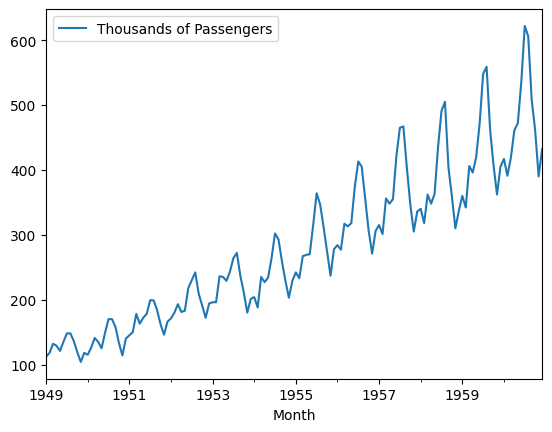

In [30]:
airline.plot()

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
# ETS 분해 모델은 덧셈모델, 곱셈모델이 있음.
# 덧셈모델(model = 'additive') => 직선 데이터에 가까운 경우 사용.
# 곱셈모델(model = 'multiplicative') => 로그, 지수적 데이터에 가까운 경우 사용.
# 즉 이 경우는 곱셈모델 사용.

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result

In [38]:
# result라는 DecomposeResult 객체에 각각 trend, resid, seasonal, 기타 등등의 값이 들어있음.
print(result.trend.head(10))
print('='*100)
print(result.seasonal.head(10))
print('='*100)
print(result.resid.head(10))

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
Name: seasonal, dtype: float64
Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
Name: resid, dtype: float64


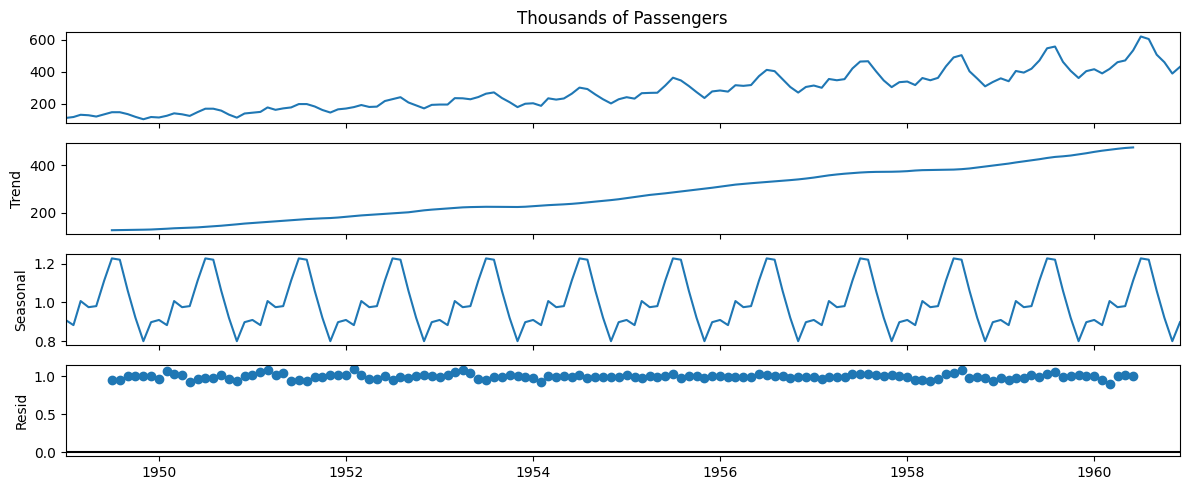

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = (12,5 )

result.plot();

<Axes: xlabel='Month'>

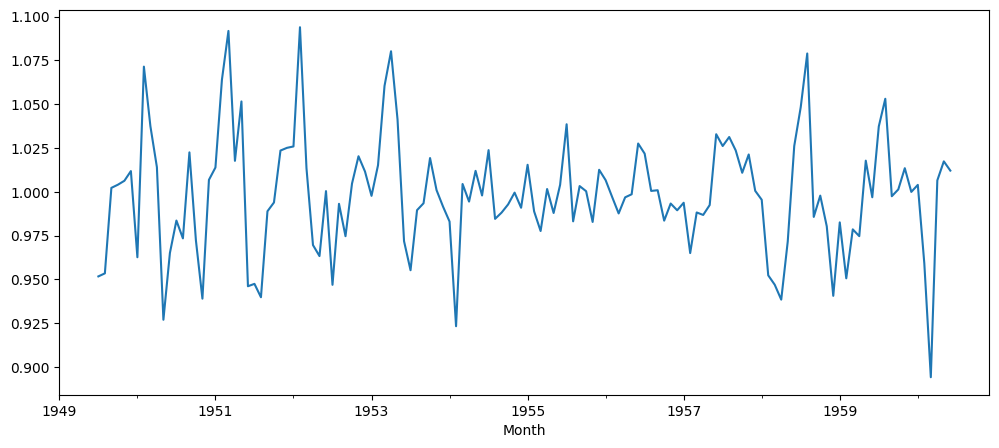

In [42]:
# 각각 그리는 것도 가능.
result.resid.plot()

# MA(Moving Average

## SMA(Simple Moving Average)

In [44]:
# SMA단순이동평균

# airline_passengers.csv 데이터 사용
airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [49]:
# rolling()을 사용하자.

# 탑승객 수의 6개월 이동평균과 12개월 이동평균 비교.
airline['6_M_SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12_M_SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.head(12)

,Thousands of Passengers,6_M_SMA,12_M_SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


<Axes: xlabel='Month'>

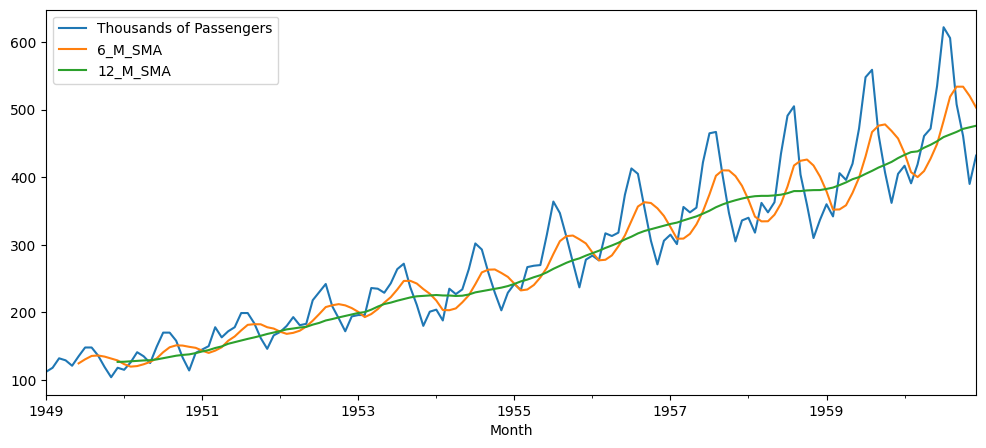

In [50]:
airline.plot()

## EWMA(Exponentially Weighted Moving Average)

In [ ]:
# EWMA(Exponentially Weighted Moving Average) Model 지수 가중 이동평균 모델
# 단순이동평균의 개념을 확장해서, 최근 데이터에 더 높은 가중치를 부여해 이동평균을 계산하는 모델.

# 단순이동평균의 단점은 아래와 같은 것들이 있는데 이 단점들을 보완할 수 있다.
# 1. 이동평균 기간이 짧다면 시계열 평균이 잘 설명되긴 하지만 signal보다 noise가 커진다는 것.
# 2. 시차가 존재한다는 것.
# 3. 미래의 변동에 대한 정보가 없다는 것.
# 4. 극단적으로 크거나 작은 값에 의해 왜곡되기 쉽다는 것.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

airline = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [58]:
# 누락된 데이터가 있는지 확인하는 과정을 꼭 거쳐야 한다.
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [61]:
airline['6_M_SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12_M_SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

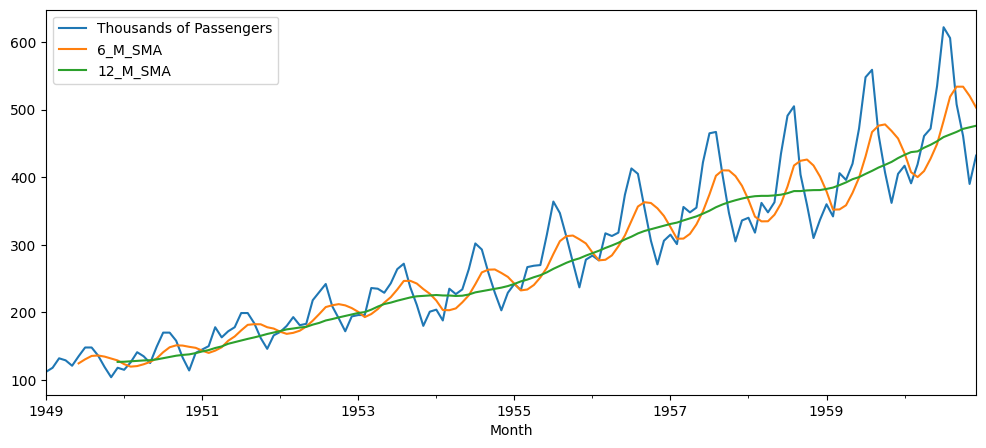

In [62]:
airline.plot()

In [64]:
# EWMA 값 계산하기.
# ewm() 메서드 사용
# airline.ewm?

airline['12_M_EWMA'] = airline['Thousands of Passengers'].ewm(span=12).mean()   # span : 이동평균 기간

<Axes: xlabel='Month'>

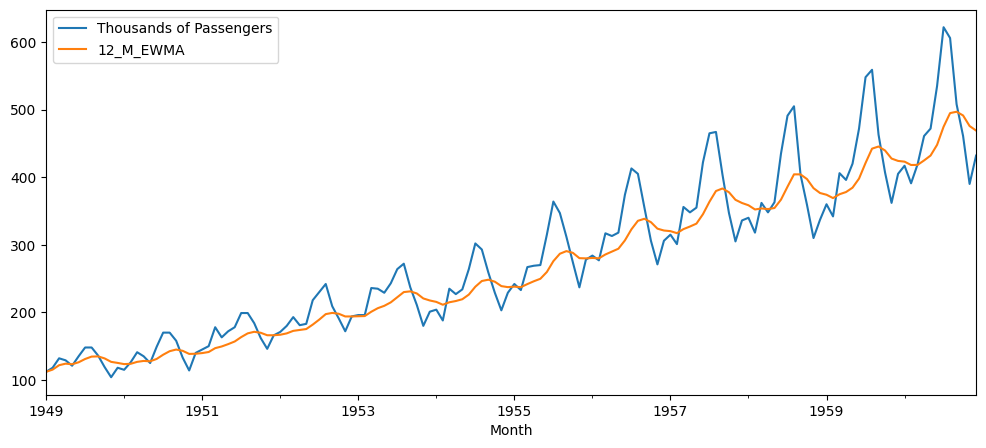

In [65]:
airline[['Thousands of Passengers', '12_M_EWMA']].plot()

# 뒤쪽으로 갈 수록 추세가 더 명확히 보인다.

# Holt-Winters Seasonal Method

In [ ]:
 # 이론적인 내용 간단하게라도 블로그에 정리하기.
 # 이거 뿐 아니고, 이 시계열 강의에서 배웠던 이론 내용들도 간단히 정리 ㄱ
 # 관련 실습은 여기에다 해놨다~ 하면서 깃헙 링크 첨부하면 좋을 듯.

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
airline = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [188]:
# 홀트-윈터스 기법을 사용하기 위해서 해당 데이터가 월별 데이터인지, 연별 데이터인지 등의 데이터의 빈도를 파악하는게 중요함.
# 사용 데이터는 월별 데이터.

In [189]:
print(airline.index)
print('='*100)
# freq=None으로 되어 있다.
# statsmodel은 freq값을 자동으로 읽기 때문에, 월별 데이터라고 수동으로 설정해주어야 한다. 인덱스가 월 단위여도 자동으로 설정 안 됨.
# ... 예전엔 이랬었지만, 지금은 자동으로 설정 된다! 만약 설정하지 않고 그냥 사용하면 아래와 같은 문구가 뜸.
# ValueWarning: No frequency information was provided, so inferred frequency MS will be used.

# 각 월의 첫 날짜로 시작하고 있으므로, 빈도를 나타내는 문자열 중 MS 사용
# 더 많은 문자열에 대해서는 https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases 의 Offset aliases 섹션 참고.
airline.index.freq = 'MS'
print(airline.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)
DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')


## Holt Method(SES, Simple Exponential Smoothing)

In [190]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [191]:
span = 12
alpha = 2/(span+1)

In [192]:
# 12개월 EWMA이 단순지수평활법과 같은 결과를 반환하는지 보자.

# 12개월 EWMA
# parameter로 span이나 alpha 둘 중 하나만 사용할 수 있고, span이나 alpha를 위와 같이 정해주었기 때문에 둘 중에 뭘 써도 같은 결과를 얻음.

airline['12_M_EWMA'] = airline['Thousands of Passengers'].ewm(span=span, adjust=False).mean()
airline

,Thousands of Passengers,12_M_EWMA
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [193]:
# 단순지수평활법(SES)

# 모델 생성. SimpleExpSmoothing(x)  =>  x : 시계열 데이터
model = SimpleExpSmoothing(airline['Thousands of Passengers'])

# .fit(smoothing_level, optimized)
#  =>  smoothing_level : alpha값을 의미한다. 0~1. 1에 가까울수록 최근 값에 더 많은 가중치 부여. 기본값은 None
#  =>  optimzed: 설정되지 않은 값들을 자동으로 최적화할지 묻는 것. 기본값은 True
model_fitted = model.fit(smoothing_level = alpha, optimized=False)

In [194]:
# 모델의 값은 .fittedvalues에 자동으로 저장됨.
model_fitted.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [195]:
# EWMA와 비교했을 때 값이 한 칸씩 밀렸다. shift()로 옮겨주고, 이 값을 원본 df의 SES 라는 컬럼에 저장.
airline['12_M_SES'] = model_fitted.fittedvalues.shift(-1)
airline

# 이로부터, 단순 지수평활법(홀트 기법)이 지수 가중 이동평균과 같은 값을 계산한다는 것을 알 수 있다!
# => 즉 해당 값을 ewm()가 아닌 statsmodel의 SimpleExpSmoothing()으로 계산할 수 있다는 것.

,Thousands of Passengers,12_M_EWMA,12_M_SES
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-08-01,606,494.898619,494.898619
1960-09-01,508,496.914216,496.914216
1960-10-01,461,491.388952,491.388952


## Holt-Winters Method

### DES(Double Exponential Smoothing)

In [196]:
# DES(Double Exponential Smoothing이중 지수평활)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='Month'>

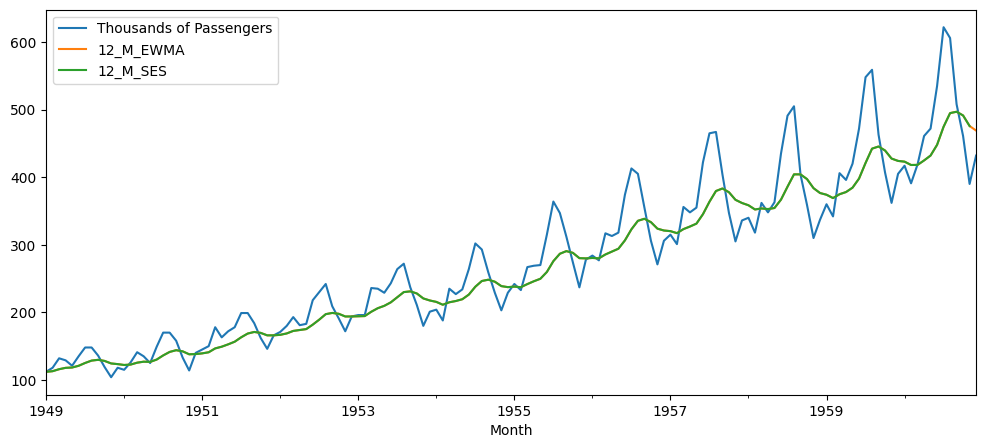

In [197]:
airline.plot()

In [198]:
# airline 데이터의 경우 추세가 선형인지, 지수적인지 구별이 힘들다. 선형적인 것 같기도.. 지수적인 것 같기도...
# 즉 덧셈모델이나 곱셈모델 둘 중 아무거나 써도 괜찮을 것 같지만,
# 우선 선형이라고 보고 덧셈모델 사용.

# ExponentialSmoothing(x, trend)  =>  x : 시계열 데이터,  trend : trend(추세) 계산에 사용할 모델 종류. 덧셈(add/addtive) or 곱셈(mul/multiplicative)

model = ExponentialSmoothing(airline['Thousands of Passengers'], trend='add')
fitted_model = model.fit()

In [199]:
airline['12_M_DES_add'] = fitted_model.fittedvalues.shift(-1)
airline

,Thousands of Passengers,12_M_EWMA,12_M_SES,12_M_DES_add
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263
...,...,...,...,...
1960-08-01,606,494.898619,494.898619,608.168786
1960-09-01,508,496.914216,496.914216,510.571382
1960-10-01,461,491.388952,491.388952,463.313463


<Axes: xlabel='Month'>

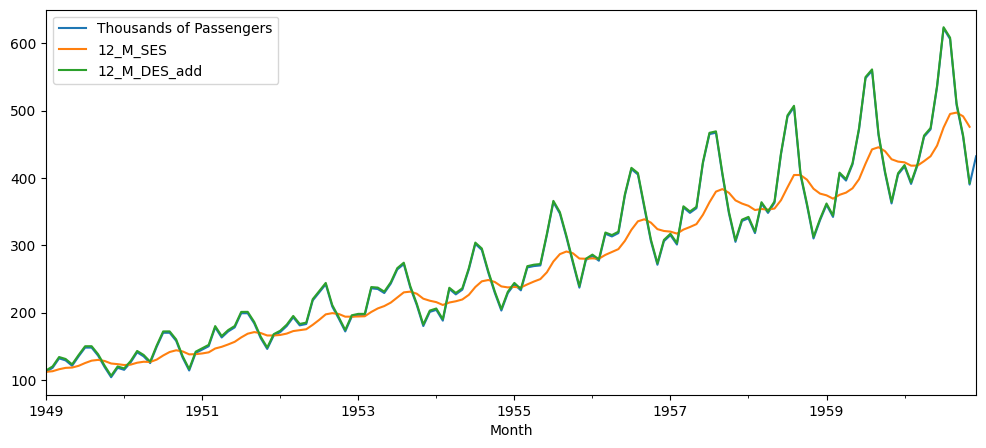

In [200]:
airline[['Thousands of Passengers', '12_M_SES', '12_M_DES_add']].plot()

<Axes: xlabel='Month'>

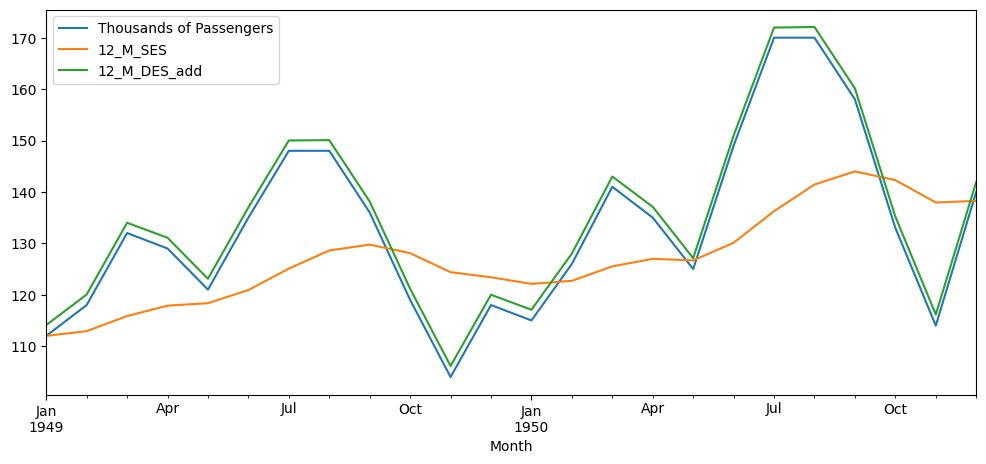

In [201]:
# 앞의 2년동안의 그래프만 확인해보자.
airline[['Thousands of Passengers', '12_M_SES', '12_M_DES_add']].iloc[:24].plot()

# 단순 지수평활보다 훨씬 더 잘 맞는 것을 볼 수 있다.

<Axes: xlabel='Month'>

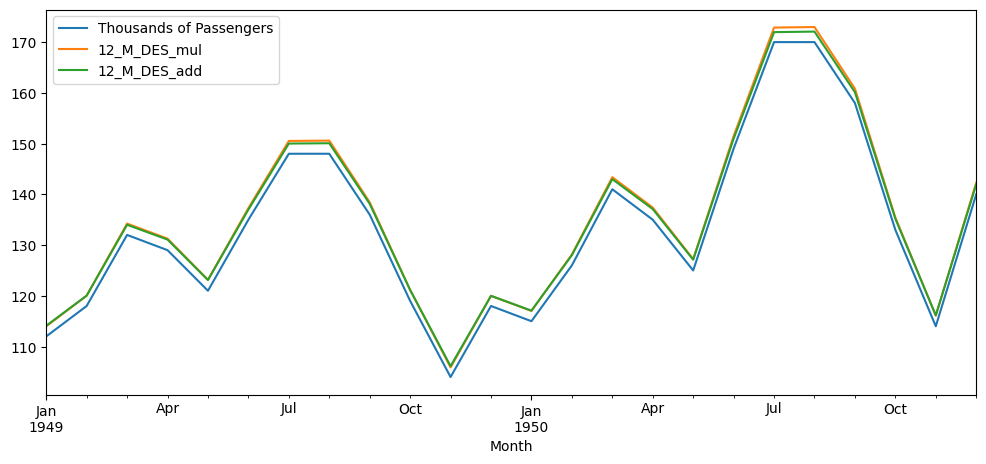

In [206]:
# 곱셈 모델도 확인해보자.
model = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul')
fitted_model = model.fit()
airline['12_M_DES_mul'] = fitted_model.fittedvalues.shift(-1)
airline[['Thousands of Passengers', '12_M_DES_mul', '12_M_DES_add']].iloc[:24].plot()

### TES(Triple Exponential Smoothing)

In [203]:
# 삼중 지수평활법은 이중 지수평활법에 비해 추세 뿐 아니라 계절성까지 확인할 수 있어서 더욱 좋은 성능을 보인다.
# ExponentialSmoothing(x, trend, seasonal, seasonal_periods)
#  =>  x:시계열 데이터,  trend:trend 계산에 사용할 모형, seasonal:seasonality 계산에 사용할 모형(덧셈/곱셈), seasonal_periods:계절성 주기.


# 이번엔 한 줄로 써보자.
# 단, 이중평활과는 다르게 shift(-1)가 필요하지 않음. seasonal과 seasobal_periods라는 parameter들이 추가되었기 때문.

airline['12_M_TES_mul'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

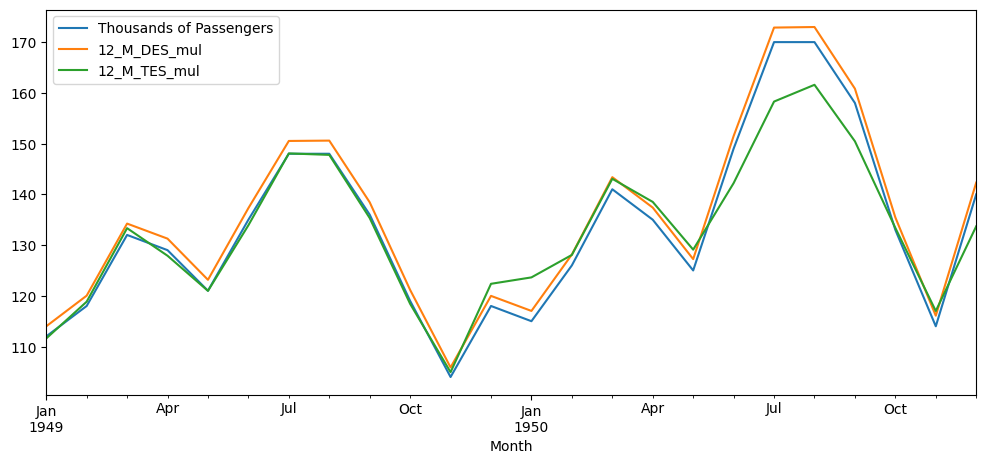

In [205]:
airline[['Thousands of Passengers', '12_M_DES_mul', '12_M_TES_mul']].iloc[:24].plot()

# 삼중 지수 평활법이 이중 지수 평활법보다 오히려 결과가 안 좋다...??
# 는 오산! "예측"에 있어서는 계절성까지 모두 포함해야 좋은 결과가 나온다.